In [1]:
%matplotlib inline

import os
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.proportion

import woi_games
import goalie_stats

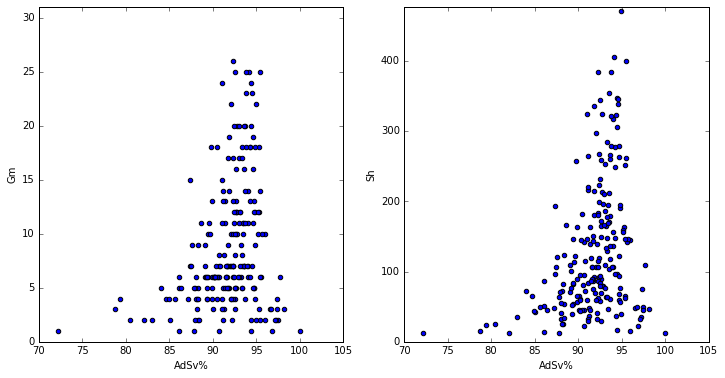

91.7348148148
92.5699874978


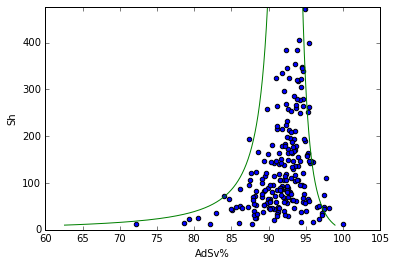

In [2]:
game_set = woi_games.woi_games('war-on-ice-goalie-2016-05-13 04-15-14.csv')

fig, axs = plt.subplots(1,2, figsize=(12, 6))

game_set.games_table().plot(kind='scatter', x='AdSv%', y='Gm', ax=axs[0])
axs[0].set_ylim(0, max(game_set.games_table()['Gm']) + 5)

game_set.games_table().plot(kind='scatter', x='AdSv%', y='Sh', ax=axs[1])
axs[1].set_ylim(0, max(game_set.games_table()['Sh']) + 5)
plt.show()

print np.mean(game_set.games_table()['AdSv%'])

lower_list = []
higher_list = []

print np.average(game_set.games_table()['AdSv%'], weights=game_set.games_table()['Sh'])
p = np.average(game_set.games_table()['AdSv%'], weights=game_set.games_table()['Sh']) / 100
for i in range(10, 500):
    (lower, higher) = statsmodels.stats.proportion.proportion_confint(p*i, i, method='wilson')
    lower_list.append(lower)
    higher_list.append(higher)

game_set.games_table().plot(kind='scatter', x='AdSv%', y='Sh')
plt.ylim(0, max(game_set.games_table()['Sh']) + 5)
plt.plot(map(lambda x: x*100, lower_list), range(10,500), color='g')
plt.plot(map(lambda x: x*100, higher_list), range(10,500), color='g')

plt.show()

In [3]:
full_games = woi_games.woi_games('C:/Users/Richard/code/fun/nhl/goalie_variance/Data')

stats = goalie_stats.goalie_stats(full_games.latest_season_instance())

# 28 being the maximum number of playoff games possible (until...we add a fifth round!)
stats.build_streaks(28)

print stats.find_threshold(3, 0.970)
print stats.find_threshold(3, 1)

0.958446251129
0.99864498645


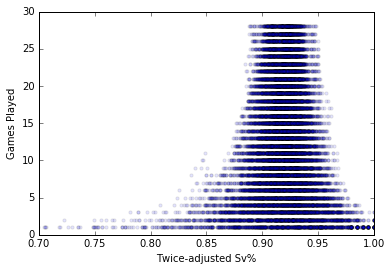

(0.5, 1)

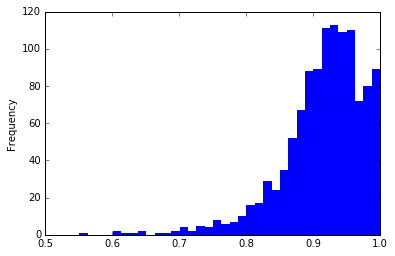

In [4]:
x = []
y = []

results = stats.streak_data()

for streak_len in results:
    for game in results[streak_len]:
        x.append(streak_len)
        y.append(game)

plt.scatter(y, x, s=10, alpha=0.1)
plt.ylim(0, int(math.ceil(max(results) / 10.0)) * 10)
plt.xlim(0.7, 1)
plt.xlabel('Twice-adjusted Sv%')
plt.ylabel('Games Played')
plt.show()

df = pd.DataFrame({'games': x, 'adj_values': y})
df.loc[df['games'] == 1, 'adj_values'].plot(kind='hist', bins=50, edgecolor = "none")
plt.xlim(0.5, 1)

In [5]:
#reload(woi_games)
#reload(goalie_stats)

fresh_games = woi_games.woi_games(['playoffs_5v5.csv', 'playoffs_sh.csv'])

playoff_stats = goalie_stats.goalie_stats(fresh_games)

stat_table_all = playoff_stats.generate_statistics()
stat_table = stat_table_all[stat_table_all['situation'] == '5v5']

# Note: Need to reduce TOI restriction at WOI to make sure I don't end up excluding PP or SH data

# Let's just discard this annoying warning for here, when I can do limited damage
pd.options.mode.chained_assignment = None  # default='warn'

stat_table['adj_agg'] = stat_table['adj_agg']/100
stat_table['AdSv%'] = stat_table['AdSv%']/100

stat_table['extremity'] = stat_table.apply(lambda x: stats.find_threshold(x['Gm'], x['adj_agg']), axis=1)

stat_table['adj_agg_rank'] = stat_table['adj_agg'].rank(ascending=False)
stat_table['extremity_rank'] = stat_table['extremity'].rank(ascending=False)
stat_table['5v5_rank'] = stat_table['AdSv%'].rank(ascending=False)

ordered = stat_table.sort_values(by='extremity', ascending=False)

#print ordered[['Name', 'Gm', 'adj_agg', 'adj_agg_rank', 'extremity', 'extremity_rank']]
print "{0:<20} Games 5v5AdSv  5v5AdRk AdSv  AdSvRk  Pctile  PctileRk".format("Name")
for index, row in ordered.iterrows():
    print "{0:<20} {1:<2} {2:>8.3f} {3:>5.0f} {4:>10.3f} {5:>3.0f} {6:>9.3f} {7:>4.0f}".format(row['Name'],
                                                                                                row['Gm'],
                                                                                                row['AdSv%'], 
                                                                                                row['5v5_rank'],
                                                                                                row['adj_agg'], 
                                                                                                row['adj_agg_rank'],
                                                                                                row['extremity'], 
                                                                                                row['extremity_rank'])

Name                 Games 5v5AdSv  5v5AdRk AdSv  AdSvRk  Pctile  PctileRk
Michal.Neuvirth      3     0.976     1      0.961   1     0.906    1
Petr.Mrazek          3     0.975     2      0.960   2     0.902    2
Ben.Bishop           11    0.944     5      0.939   4     0.894    3
Braden.Holtby        12    0.936     7      0.936   6     0.857    4
Antti.Raanta         3     0.960     3      0.948   3     0.816    5
Martin.Jones         24    0.935     8      0.930   8     0.792    6
Andrei.Vasilevskiy   8     0.938     6      0.934   7     0.782    7
Roberto.Luongo       6     0.955     4      0.937   5     0.773    8
Matthew.Murray       21    0.935     9      0.925   9     0.641    9
Brian.Elliott        18    0.931    10      0.921  10     0.561   10
Corey.Crawford       7     0.927    11      0.919  12     0.484   11
Thomas.Greiss        11    0.926    12      0.919  11     0.482   12
Frederik.Andersen    5     0.924    13      0.916  13     0.448   13
Jake.Allen           4     0

In [6]:
#reload(goalie_stats)
#reload(woi_games)

fresh_games = woi_games.woi_games(['playoffs_5v5_all_time.csv', 'playoffs_sh_all_time.csv'])

playoff_stats = goalie_stats.goalie_stats(fresh_games)

stat_table_all = playoff_stats.generate_statistics()
stat_table = stat_table_all[stat_table_all['situation'] == '5v5']

# Note: Need to reduce TOI restriction at WOI to make sure I don't end up excluding PP or SH data

# Let's just discard this annoying warning for here, when I can do limited damage
pd.options.mode.chained_assignment = None  # default='warn'

stat_table['adj_agg'] = stat_table['adj_agg']/100
stat_table['AdSv%'] = stat_table['AdSv%']/100

stat_table['extremity'] = stat_table.apply(lambda x: stats.find_threshold(x['Gm'], x['adj_agg']), axis=1)

stat_table['adj_agg_rank'] = stat_table['adj_agg'].rank(ascending=False)
stat_table['extremity_rank'] = stat_table['extremity'].rank(ascending=False)
stat_table['5v5_rank'] = stat_table['AdSv%'].rank(ascending=False)

ordered = stat_table.sort_values(by='extremity', ascending=False)

#print ordered[['Name', 'Gm', 'adj_agg', 'adj_agg_rank', 'extremity', 'extremity_rank']]
print "{0:<25} Season   Games 5v5AdSv  5v5AdRk AdSv  AdSvRk  Pctile  PctileRk".format("Name")
for index, row in ordered.iterrows():
    print "{0:<25} {1} {2:<2} {3:>8.3f} {4:>5.0f} {5:>10.3f} {6:>3.0f} {7:>9.3f} {8:>4.0f}".format(
        row['Name'], 
        row['season'],        
        row['Gm'],
        row['AdSv%'], 
        row['5v5_rank'],
        row['adj_agg'], 
        row['adj_agg_rank'],
        row['extremity'], 
        row['extremity_rank'])

Name                      Season   Games 5v5AdSv  5v5AdRk AdSv  AdSvRk  Pctile  PctileRk
Mike.Smith                20112012 16    0.953    11      0.948   8     0.981    1
Ilya.Bryzgalov            20052006 12    0.958     9      0.952   5     0.981    2
Antero.Niittymaki         20102011 2     1.000     1      0.980   1     0.961    3
Tuukka.Rask               20122013 22    0.941    26      0.939  13     0.960    4
Jonathan.Quick            20112012 20    0.942    25      0.938  15     0.946    5
Craig.Anderson            20142015 4     0.966     5      0.958   4     0.928    6
Michal.Neuvirth           20152016 3     0.976     3      0.963   2     0.921    7
Jonathan.Quick            20122013 18    0.944    20      0.938  16     0.917    8
Petr.Mrazek               20152016 3     0.975     4      0.963   3     0.916    9
Jonas.Hiller              20082009 13    0.949    15      0.940  12     0.914   10
Tim.Thomas                20102011 25    0.948    16      0.934  29     0.910   1